In [6]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, BatchNormalization, Dropout, AveragePooling2D

### Helper Functions

In [7]:
def lossAccPlot(history):
  plt.figure(figsize=(20,5))

  plt.subplot(211)
  plt.title('Loss')
  plt.plot(history.history['loss'], color='b', label='train')
  plt.plot(history.history['val_loss'], color='r', label='validation')
  plt.legend()

  plt.subplot(212)
  plt.title('Accuracy')
  plt.plot(history.history['accuracy'], color='blue', label='train')
  plt.plot(history.history['val_accuracy'], color='r', label='validation')
  plt.legend()
  plt.ylim([0,1])

### Loading the Dataset

In [18]:
from tensorflow.keras.datasets import cifar10
(x_train,y_train_cls),(x_test,y_test_cls) = cifar10.load_data()
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

x_train = x_train/255
x_test = x_test/255

y_train = np.squeeze(tf.one_hot(y_train_cls, 10))
y_test = np.squeeze(tf.one_hot(y_test_cls, 10))

### Showing the Imgages

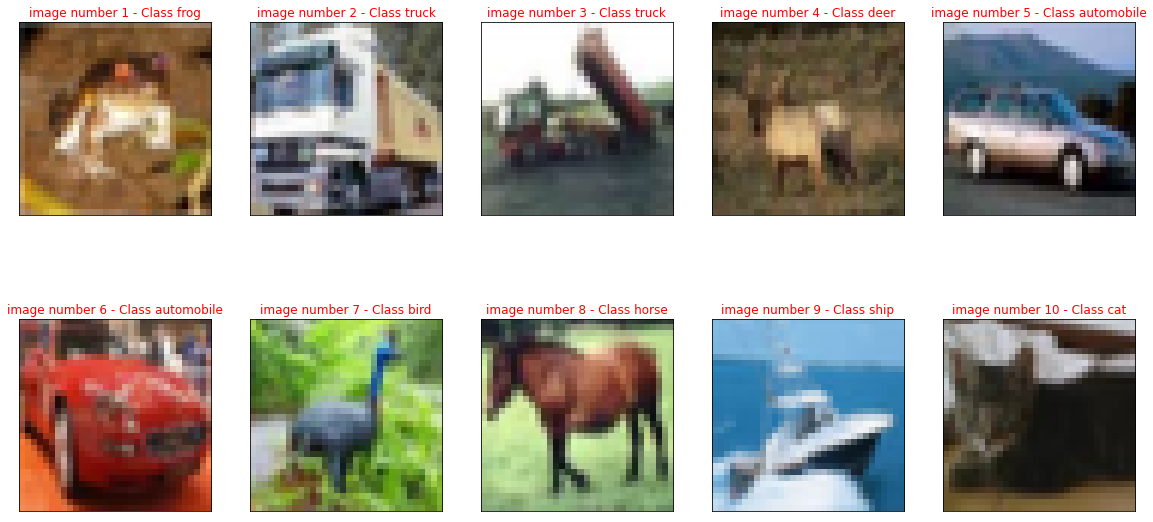

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(20,10))

for i, ax in enumerate(axes.flat):
    img = x_train[i]
    ax.imshow(img)
    ax.set_title("image number {0} - Class {1}".format(i+1, class_names[y_train_cls[i][0]]), color='r')
    ax.set_xticks([])
    ax.set_yticks([])

###  Separating the datas to train, validation, and test

In [19]:
num_train = 45000

print(x_train.shape, y_train.shape)

x_validation = x_train[num_train:][:]
y_validation = y_train[num_train:][:]

x_train = x_train[:num_train][:]
y_train = y_train[:num_train][:]

feature_vector_length = 32*32*3
num_classes = 10

print(x_validation.shape, y_validation.shape)

(50000, 32, 32, 3) (50000, 10)
(5000, 32, 32, 3) (5000, 10)


## MLP

### Part a - ReLU

#### batch size = 32

Epoch 1/10
1407/1407 [==============================] - 28s 19ms/step - loss: 1.8048 - accuracy: 0.3576 - val_loss: 1.7352 - val_accuracy: 0.3894
Epoch 2/10
1407/1407 [==============================] - 25s 18ms/step - loss: 1.6109 - accuracy: 0.4336 - val_loss: 1.6605 - val_accuracy: 0.4110
Epoch 3/10
1407/1407 [==============================] - 25s 18ms/step - loss: 1.5314 - accuracy: 0.4579 - val_loss: 1.6780 - val_accuracy: 0.3920
Epoch 4/10
1407/1407 [==============================] - 25s 18ms/step - loss: 1.4727 - accuracy: 0.4808 - val_loss: 1.6207 - val_accuracy: 0.4160
Epoch 5/10
1407/1407 [==============================] - 25s 18ms/step - loss: 1.4218 - accuracy: 0.5003 - val_loss: 1.5043 - val_accuracy: 0.4622
Epoch 6/10
1407/1407 [==============================] - 25s 18ms/step - loss: 1.3770 - accuracy: 0.5178 - val_loss: 1.5374 - val_accuracy: 0.4620
Epoch 7/10
1407/1407 [==============================] - 25s 18ms/step - loss: 1.3360 - accuracy: 0.5326 - val_loss: 1.6587 -

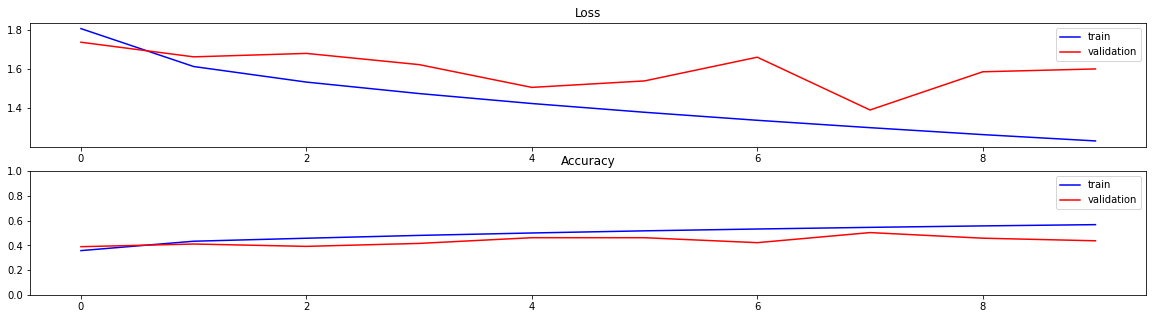

In [20]:
batch_size = 32
epochs_number = 10
learning_rate = 1e-2

hl1_nn = 2*feature_vector_length
hl2_nn = feature_vector_length

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(hl1_nn, activation='relu'))
model.add(tf.keras.layers.Dense(hl2_nn, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.05)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(np.reshape(x_train,(num_train,32*32*3)), y_train, epochs=epochs_number, batch_size=batch_size, validation_data=(np.reshape(x_validation,(50000-num_train,32*32*3)), y_validation))

lossAccPlot(history)

test_results = model.evaluate(np.reshape(x_test,(x_test.shape[0],32*32*3)), y_test, verbose=1)
print('\n', "Test results - Loss: {0:.2f} - Accuracy: {1:.2f}%".format(test_results[0],test_results[1]), '\n')

#### batch size = 64

Epoch 1/10
704/704 [==============================] - 16s 22ms/step - loss: 1.8575 - accuracy: 0.3400 - val_loss: 2.1244 - val_accuracy: 0.2684
Epoch 2/10
704/704 [==============================] - 15s 22ms/step - loss: 1.6740 - accuracy: 0.4140 - val_loss: 1.8787 - val_accuracy: 0.3202
Epoch 3/10
704/704 [==============================] - 14s 20ms/step - loss: 1.5960 - accuracy: 0.4417 - val_loss: 1.7483 - val_accuracy: 0.3778
Epoch 4/10
704/704 [==============================] - 14s 20ms/step - loss: 1.5421 - accuracy: 0.4589 - val_loss: 1.7455 - val_accuracy: 0.4036
Epoch 5/10
704/704 [==============================] - 14s 20ms/step - loss: 1.5015 - accuracy: 0.4762 - val_loss: 1.6681 - val_accuracy: 0.4196
Epoch 6/10
704/704 [==============================] - 14s 20ms/step - loss: 1.4623 - accuracy: 0.4896 - val_loss: 1.7378 - val_accuracy: 0.3786
Epoch 7/10
704/704 [==============================] - 14s 20ms/step - loss: 1.4279 - accuracy: 0.5009 - val_loss: 1.8996 - val_accuracy:

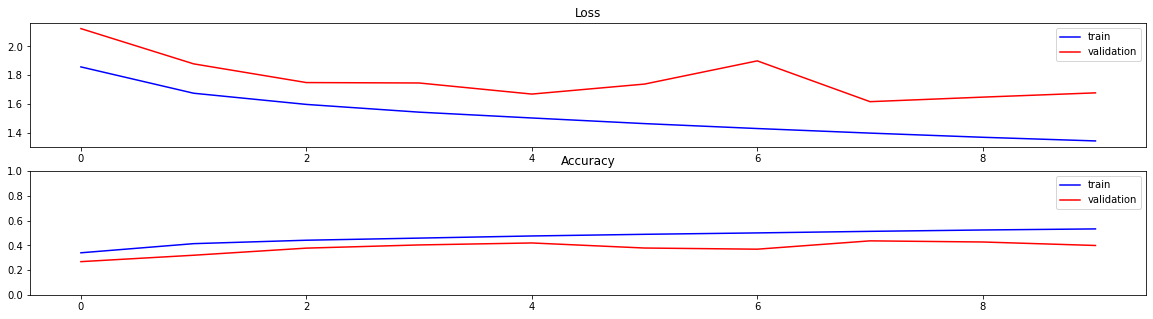

In [ ]:
batch_size = 64
epochs_number = 10
learning_rate = 1e-2

hl1_nn = 2*feature_vector_length
hl2_nn = feature_vector_length

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(hl1_nn, activation='relu'))
model.add(tf.keras.layers.Dense(hl2_nn, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.05)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(np.reshape(x_train,(num_train,32*32*3)), y_train, epochs=epochs_number, batch_size=batch_size, validation_data=(np.reshape(x_validation,(50000-num_train,32*32*3)), y_validation))

lossAccPlot(history)

test_results = model.evaluate(np.reshape(x_test,(x_test.shape[0],32*32*3)), y_test, verbose=1)
print('\n', "Test results - Loss: {0:.2f} - Accuracy: {1:.2f}%".format(test_results[0],test_results[1]), '\n')

#### batch size = 256

Epoch 1/10
176/176 [==============================] - 7s 37ms/step - loss: 1.9749 - accuracy: 0.3030 - val_loss: 1.8526 - val_accuracy: 0.3512
Epoch 2/10
176/176 [==============================] - 6s 36ms/step - loss: 1.8101 - accuracy: 0.3699 - val_loss: 1.7927 - val_accuracy: 0.3596
Epoch 3/10
176/176 [==============================] - 6s 36ms/step - loss: 1.7444 - accuracy: 0.3933 - val_loss: 1.7419 - val_accuracy: 0.3976
Epoch 4/10
176/176 [==============================] - 6s 36ms/step - loss: 1.7041 - accuracy: 0.4062 - val_loss: 1.7082 - val_accuracy: 0.4016
Epoch 5/10
176/176 [==============================] - 6s 36ms/step - loss: 1.6681 - accuracy: 0.4228 - val_loss: 1.6677 - val_accuracy: 0.4182
Epoch 6/10
176/176 [==============================] - 6s 36ms/step - loss: 1.6401 - accuracy: 0.4305 - val_loss: 1.6754 - val_accuracy: 0.4134
Epoch 7/10
176/176 [==============================] - 6s 36ms/step - loss: 1.6151 - accuracy: 0.4409 - val_loss: 1.6376 - val_accuracy: 0.4324

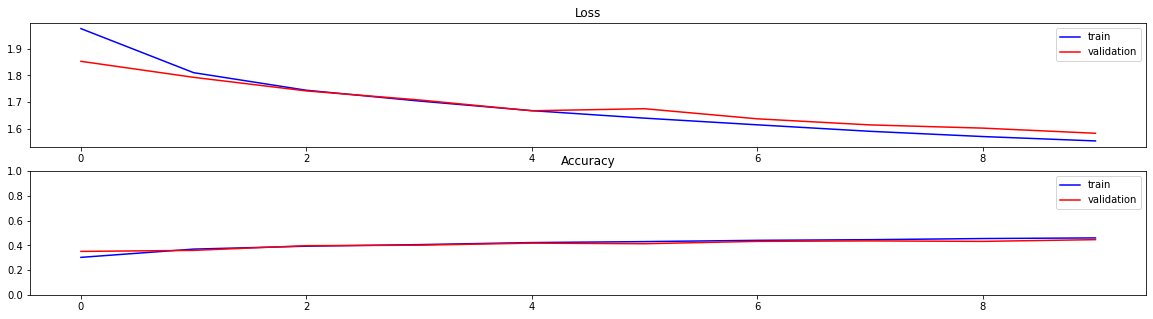

In [ ]:
batch_size = 256
epochs_number = 10
learning_rate = 1e-2

hl1_nn = 2*feature_vector_length
hl2_nn = feature_vector_length

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(hl1_nn, activation='relu'))
model.add(tf.keras.layers.Dense(hl2_nn, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.05)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(np.reshape(x_train,(num_train,32*32*3)), y_train, epochs=epochs_number, batch_size=batch_size, validation_data=(np.reshape(x_validation,(50000-num_train,32*32*3)), y_validation))

lossAccPlot(history)

test_results = model.evaluate(np.reshape(x_test,(x_test.shape[0],32*32*3)), y_test, verbose=1)
print('\n', "Test results - Loss: {0:.2f} - Accuracy: {1:.2f}%".format(test_results[0],test_results[1]), '\n')

### Part b - tanh

#### batch size = 32

Epoch 1/10
1407/1407 [==============================] - 25s 18ms/step - loss: 1.9811 - accuracy: 0.3247 - val_loss: 1.9210 - val_accuracy: 0.3304
Epoch 2/10
1407/1407 [==============================] - 25s 18ms/step - loss: 1.7472 - accuracy: 0.3884 - val_loss: 1.8934 - val_accuracy: 0.3316
Epoch 3/10
1407/1407 [==============================] - 25s 18ms/step - loss: 1.6776 - accuracy: 0.4093 - val_loss: 1.7010 - val_accuracy: 0.3984
Epoch 4/10
1407/1407 [==============================] - 25s 18ms/step - loss: 1.6221 - accuracy: 0.4288 - val_loss: 1.7737 - val_accuracy: 0.3796
Epoch 5/10
1407/1407 [==============================] - 25s 18ms/step - loss: 1.5826 - accuracy: 0.4423 - val_loss: 1.6057 - val_accuracy: 0.4368
Epoch 6/10
1407/1407 [==============================] - 25s 18ms/step - loss: 1.5507 - accuracy: 0.4519 - val_loss: 1.6367 - val_accuracy: 0.4150
Epoch 7/10
1407/1407 [==============================] - 25s 18ms/step - loss: 1.5188 - accuracy: 0.4648 - val_loss: 1.7512 -

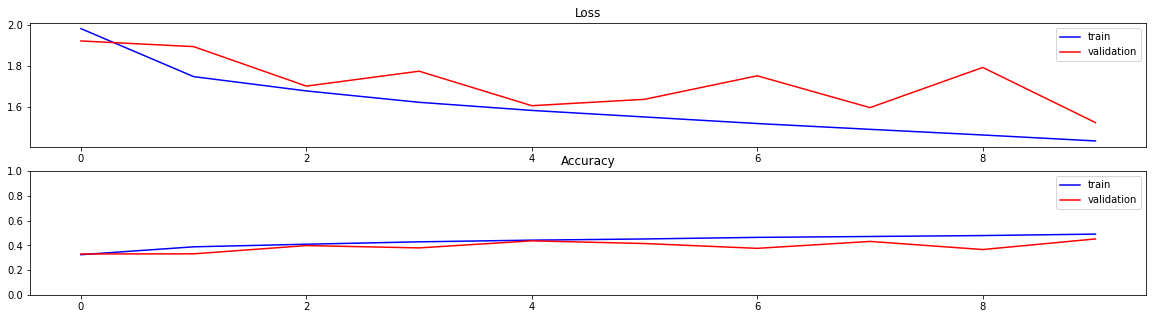

In [ ]:
batch_size = 32
epochs_number = 10
learning_rate = 1e-2

hl1_nn = 2*feature_vector_length
hl2_nn = feature_vector_length

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(hl1_nn, activation='tanh'))
model.add(tf.keras.layers.Dense(hl2_nn, activation='tanh'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.05)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(np.reshape(x_train,(num_train,32*32*3)), y_train, epochs=epochs_number, batch_size=batch_size, validation_data=(np.reshape(x_validation,(50000-num_train,32*32*3)), y_validation))

lossAccPlot(history)

test_results = model.evaluate(np.reshape(x_test,(x_test.shape[0],32*32*3)), y_test, verbose=1)
print('\n', "Test results - Loss: {0:.2f} - Accuracy: {1:.2f}%".format(test_results[0],test_results[1]), '\n')

#### batch size = 64

Epoch 1/10
704/704 [==============================] - 15s 20ms/step - loss: 2.0387 - accuracy: 0.3044 - val_loss: 2.2018 - val_accuracy: 0.2916
Epoch 2/10
704/704 [==============================] - 14s 20ms/step - loss: 1.7887 - accuracy: 0.3698 - val_loss: 2.1300 - val_accuracy: 0.2576
Epoch 3/10
704/704 [==============================] - 14s 19ms/step - loss: 1.7273 - accuracy: 0.3924 - val_loss: 1.8396 - val_accuracy: 0.3566
Epoch 4/10
704/704 [==============================] - 14s 19ms/step - loss: 1.6826 - accuracy: 0.4085 - val_loss: 2.1220 - val_accuracy: 0.2980
Epoch 5/10
704/704 [==============================] - 14s 19ms/step - loss: 1.6432 - accuracy: 0.4255 - val_loss: 1.8964 - val_accuracy: 0.3616
Epoch 6/10
704/704 [==============================] - 14s 20ms/step - loss: 1.6123 - accuracy: 0.4338 - val_loss: 1.8293 - val_accuracy: 0.3530
Epoch 7/10
704/704 [==============================] - 14s 19ms/step - loss: 1.5880 - accuracy: 0.4425 - val_loss: 2.4682 - val_accuracy:

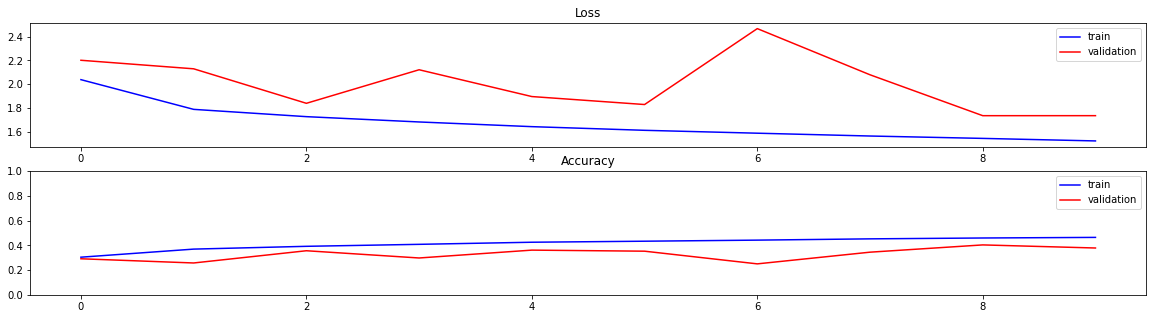

In [ ]:
batch_size = 64
epochs_number = 10
learning_rate = 1e-2

hl1_nn = 2*feature_vector_length
hl2_nn = feature_vector_length

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(hl1_nn, activation='tanh'))
model.add(tf.keras.layers.Dense(hl2_nn, activation='tanh'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.05)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(np.reshape(x_train,(num_train,32*32*3)), y_train, epochs=epochs_number, batch_size=batch_size, validation_data=(np.reshape(x_validation,(50000-num_train,32*32*3)), y_validation))

lossAccPlot(history)

test_results = model.evaluate(np.reshape(x_test,(x_test.shape[0],32*32*3)), y_test, verbose=1)
print('\n', "Test results - Loss: {0:.2f} - Accuracy: {1:.2f}%".format(test_results[0],test_results[1]), '\n')

#### batch size = 256

Epoch 1/20
176/176 [==============================] - 7s 37ms/step - loss: 2.1392 - accuracy: 0.2644 - val_loss: 1.9464 - val_accuracy: 0.3298
Epoch 2/20
176/176 [==============================] - 6s 36ms/step - loss: 1.8892 - accuracy: 0.3344 - val_loss: 1.8826 - val_accuracy: 0.3402
Epoch 3/20
176/176 [==============================] - 6s 36ms/step - loss: 1.8261 - accuracy: 0.3568 - val_loss: 1.8569 - val_accuracy: 0.3482
Epoch 4/20
176/176 [==============================] - 6s 36ms/step - loss: 1.7848 - accuracy: 0.3752 - val_loss: 1.8394 - val_accuracy: 0.3416
Epoch 5/20
176/176 [==============================] - 6s 36ms/step - loss: 1.7618 - accuracy: 0.3830 - val_loss: 1.7479 - val_accuracy: 0.3894
Epoch 6/20
176/176 [==============================] - 6s 36ms/step - loss: 1.7391 - accuracy: 0.3922 - val_loss: 1.7454 - val_accuracy: 0.3922
Epoch 7/20
176/176 [==============================] - 6s 35ms/step - loss: 1.7195 - accuracy: 0.3996 - val_loss: 1.8003 - val_accuracy: 0.3944

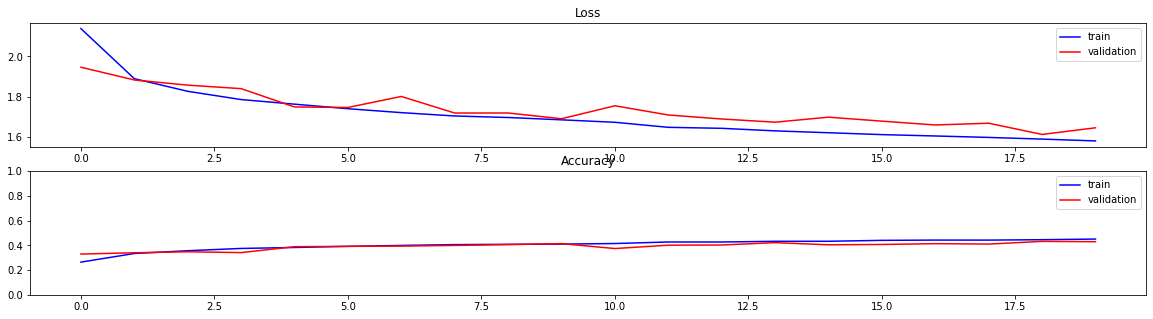

In [ ]:
batch_size = 256
epochs_number = 20
learning_rate = 1e-2

hl1_nn = 2*feature_vector_length
hl2_nn = feature_vector_length

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(hl1_nn, activation='tanh'))
model.add(tf.keras.layers.Dense(hl2_nn, activation='tanh'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.05)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(np.reshape(x_train,(num_train,32*32*3)), y_train, epochs=epochs_number, batch_size=batch_size, validation_data=(np.reshape(x_validation,(50000-num_train,32*32*3)), y_validation))

lossAccPlot(history)

test_results = model.evaluate(np.reshape(x_test,(x_test.shape[0],32*32*3)), y_test, verbose=1)
print('\n', "Test results - Loss: {0:.2f} - Accuracy: {1:.2f}%".format(test_results[0],test_results[1]), '\n')

### Part c

#### MSE

Epoch 1/20
1407/1407 [==============================] - 30s 20ms/step - loss: 0.0865 - accuracy: 0.2311 - recall: 2.4444e-04 - precision: 1.0000 - val_loss: 0.0838 - val_accuracy: 0.2920 - val_recall: 8.0000e-04 - val_precision: 1.0000
Epoch 2/20
1407/1407 [==============================] - 28s 20ms/step - loss: 0.0822 - accuracy: 0.3120 - recall: 0.0120 - precision: 0.7414 - val_loss: 0.0812 - val_accuracy: 0.3216 - val_recall: 0.0182 - val_precision: 0.7459
Epoch 3/20
1407/1407 [==============================] - 28s 20ms/step - loss: 0.0799 - accuracy: 0.3471 - recall: 0.0309 - precision: 0.7120 - val_loss: 0.0794 - val_accuracy: 0.3506 - val_recall: 0.0438 - val_precision: 0.6997
Epoch 4/20
1407/1407 [==============================] - 28s 20ms/step - loss: 0.0783 - accuracy: 0.3638 - recall: 0.0452 - precision: 0.7134 - val_loss: 0.0781 - val_accuracy: 0.3674 - val_recall: 0.0508 - val_precision: 0.7257
Epoch 5/20
1407/1407 [==============================] - 29s 21ms/step - loss: 0.

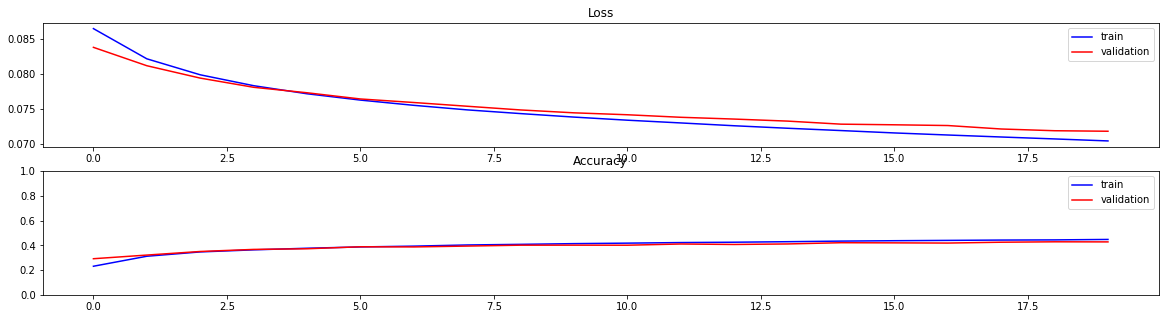

In [22]:
batch_size = 32
epochs_number = 20
learning_rate = 1e-2
momentum = 0.2
hl1_nn = 2*feature_vector_length
hl2_nn = feature_vector_length

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(hl1_nn, activation='relu'))
model.add(tf.keras.layers.Dense(hl2_nn, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.05)
model.compile(loss='mse', optimizer=optimizer, metrics=['accuracy','Recall', 'Precision'])
history = model.fit(np.reshape(x_train,(num_train,32*32*3)), y_train, epochs=epochs_number, batch_size=batch_size, validation_data=(np.reshape(x_validation,(50000-num_train,32*32*3)), y_validation))

lossAccPlot(history)

test_results = model.evaluate(np.reshape(x_test,(x_test.shape[0],32*32*3)), y_test, verbose=1)
print('\n', "Test results - Loss: {0:.2f} - Accuracy: {1:.2f}%".format(test_results[0],test_results[1]), '\n')

#### Cross Entropy

Epoch 1/20
704/704 [==============================] - 17s 23ms/step - loss: 1.8597 - accuracy: 0.3380 - recall: 0.0566 - precision: 0.6308 - val_loss: 2.3495 - val_accuracy: 0.2134 - val_recall: 0.1484 - val_precision: 0.2372
Epoch 2/20
704/704 [==============================] - 16s 22ms/step - loss: 1.6773 - accuracy: 0.4118 - recall: 0.1221 - precision: 0.6786 - val_loss: 2.4745 - val_accuracy: 0.1874 - val_recall: 0.1198 - val_precision: 0.1818
Epoch 3/20
704/704 [==============================] - 15s 22ms/step - loss: 1.5996 - accuracy: 0.4384 - recall: 0.1620 - precision: 0.6945 - val_loss: 1.7705 - val_accuracy: 0.3530 - val_recall: 0.1506 - val_precision: 0.4471
Epoch 4/20
704/704 [==============================] - 15s 22ms/step - loss: 1.5449 - accuracy: 0.4586 - recall: 0.1905 - precision: 0.7022 - val_loss: 2.5292 - val_accuracy: 0.2094 - val_recall: 0.1380 - val_precision: 0.2083
Epoch 5/20
704/704 [==============================] - 15s 22ms/step - loss: 1.5022 - accuracy: 0

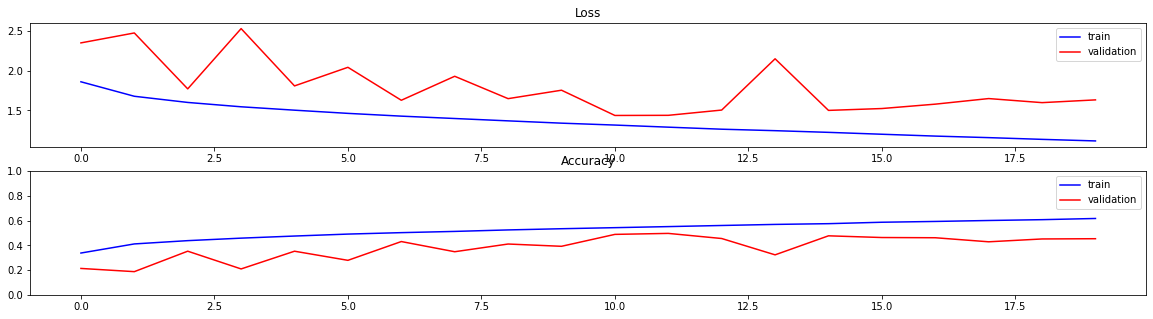

In [23]:
batch_size = 64
epochs_number = 20
learning_rate = 1e-2
momentum = 0.2

hl1_nn = 2*feature_vector_length
hl2_nn = feature_vector_length

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(hl1_nn, activation='relu'))
model.add(tf.keras.layers.Dense(hl2_nn, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.05)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy','Recall', 'Precision'])
history = model.fit(np.reshape(x_train,(num_train,32*32*3)), y_train, epochs=epochs_number, batch_size=batch_size, validation_data=(np.reshape(x_validation,(50000-num_train,32*32*3)), y_validation))

lossAccPlot(history)

test_results = model.evaluate(np.reshape(x_test,(x_test.shape[0],32*32*3)), y_test, verbose=1)
print('\n', "Test results - Loss: {0:.2f} - Accuracy: {1:.2f}%".format(test_results[0],test_results[1]), '\n')

## CNN

### Part a

Epoch 1/10
704/704 [==============================] - 52s 72ms/step - loss: 1.4880 - accuracy: 0.4736 - val_loss: 1.2435 - val_accuracy: 0.5622
Epoch 2/10
704/704 [==============================] - 49s 70ms/step - loss: 1.0521 - accuracy: 0.6336 - val_loss: 1.0276 - val_accuracy: 0.6422
Epoch 3/10
704/704 [==============================] - 50s 71ms/step - loss: 0.8490 - accuracy: 0.7074 - val_loss: 0.9965 - val_accuracy: 0.6590
Epoch 4/10
704/704 [==============================] - 49s 70ms/step - loss: 0.6856 - accuracy: 0.7636 - val_loss: 0.9389 - val_accuracy: 0.6818
Epoch 5/10
704/704 [==============================] - 49s 70ms/step - loss: 0.5289 - accuracy: 0.8187 - val_loss: 0.9654 - val_accuracy: 0.6774
Epoch 6/10
704/704 [==============================] - 49s 70ms/step - loss: 0.3800 - accuracy: 0.8749 - val_loss: 1.0672 - val_accuracy: 0.6734
Epoch 7/10
704/704 [==============================] - 49s 70ms/step - loss: 0.2468 - accuracy: 0.9205 - val_loss: 1.2651 - val_accuracy:

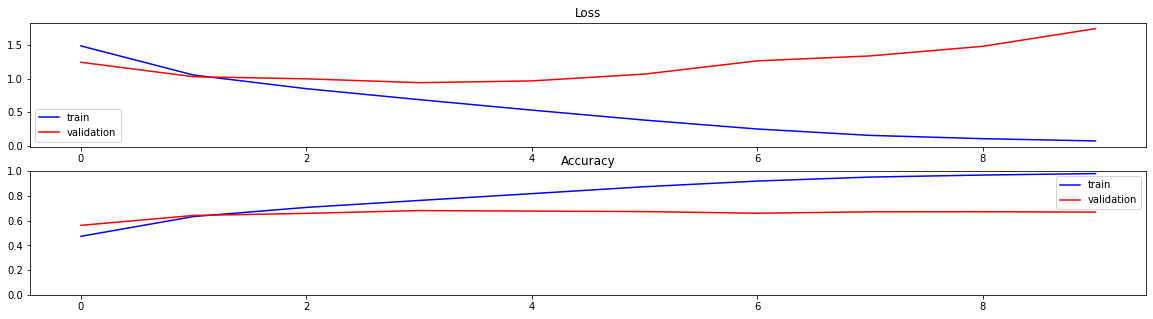

In [ ]:
batch_size = 64
epochs_number = 10
learning_rate = 1e-4
num_classes = 10

model = tf.keras.models.Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))


model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))


model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))


optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=epochs_number, batch_size=batch_size, validation_data=(x_validation, y_validation))

lossAccPlot(history)

test_results = model.evaluate(x_test, y_test, verbose=1)
print('\n', "Test results - Loss: {0:.2f} - Accuracy: {1:.2f}%".format(test_results[0],test_results[1]), '\n')

### Part b

Epoch 1/10
704/704 [==============================] - 18s 24ms/step - loss: 1.6321 - accuracy: 0.4316 - val_loss: 1.3031 - val_accuracy: 0.5412
Epoch 2/10
704/704 [==============================] - 16s 23ms/step - loss: 1.1775 - accuracy: 0.5873 - val_loss: 1.1487 - val_accuracy: 0.5956
Epoch 3/10
704/704 [==============================] - 16s 23ms/step - loss: 0.9763 - accuracy: 0.6608 - val_loss: 1.0465 - val_accuracy: 0.6320
Epoch 4/10
704/704 [==============================] - 16s 23ms/step - loss: 0.8292 - accuracy: 0.7150 - val_loss: 1.0088 - val_accuracy: 0.6450
Epoch 5/10
704/704 [==============================] - 16s 23ms/step - loss: 0.6990 - accuracy: 0.7653 - val_loss: 1.0073 - val_accuracy: 0.6588
Epoch 6/10
704/704 [==============================] - 16s 23ms/step - loss: 0.5831 - accuracy: 0.8076 - val_loss: 1.0322 - val_accuracy: 0.6534
Epoch 7/10
704/704 [==============================] - 16s 23ms/step - loss: 0.4753 - accuracy: 0.8509 - val_loss: 1.0369 - val_accuracy:

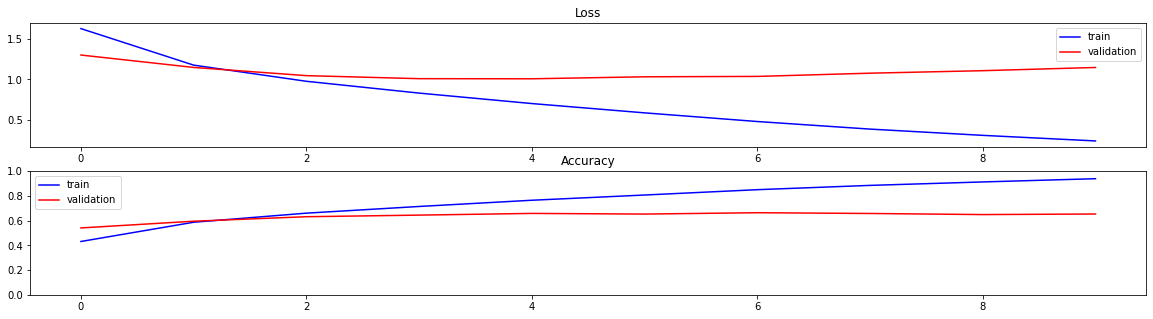

In [ ]:
batch_size = 64
epochs_number = 10
learning_rate = 1e-4
num_classes = 10

model = tf.keras.models.Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))


model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))


model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(num_classes, activation='softmax'))


optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=epochs_number, batch_size=batch_size, validation_data=(x_validation, y_validation))

lossAccPlot(history)

test_results = model.evaluate(x_test, y_test, verbose=1)
print('\n', "Test results - Loss: {0:.2f} - Accuracy: {1:.2f}%".format(test_results[0],test_results[1]), '\n')

### Part c

Epoch 1/50
704/704 [==============================] - 19s 25ms/step - loss: 2.2780 - accuracy: 0.2899 - val_loss: 1.5025 - val_accuracy: 0.4614
Epoch 2/50
704/704 [==============================] - 17s 24ms/step - loss: 1.7474 - accuracy: 0.4026 - val_loss: 1.3549 - val_accuracy: 0.5144
Epoch 3/50
704/704 [==============================] - 17s 24ms/step - loss: 1.5420 - accuracy: 0.4624 - val_loss: 1.2438 - val_accuracy: 0.5572
Epoch 4/50
704/704 [==============================] - 17s 24ms/step - loss: 1.4009 - accuracy: 0.5074 - val_loss: 1.1776 - val_accuracy: 0.5844
Epoch 5/50
704/704 [==============================] - 17s 24ms/step - loss: 1.2992 - accuracy: 0.5418 - val_loss: 1.0993 - val_accuracy: 0.6112
Epoch 6/50
704/704 [==============================] - 17s 25ms/step - loss: 1.2062 - accuracy: 0.5736 - val_loss: 1.0182 - val_accuracy: 0.6462
Epoch 7/50
704/704 [==============================] - 17s 25ms/step - loss: 1.1279 - accuracy: 0.5994 - val_loss: 0.9991 - val_accuracy:

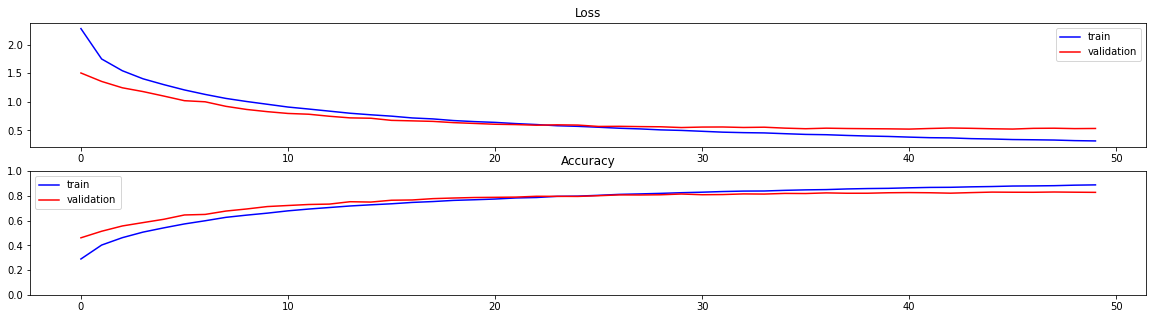

In [ ]:
batch_size = 64
epochs_number = 50
learning_rate = 1e-4
num_classes = 10

model = tf.keras.models.Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))


model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))


model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(num_classes, activation='softmax'))


optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=epochs_number, batch_size=batch_size, validation_data=(x_validation, y_validation))

lossAccPlot(history)

test_results = model.evaluate(x_test, y_test, verbose=1)
print('\n', "Test results - Loss: {0:.2f} - Accuracy: {1:.2f}%".format(test_results[0],test_results[1]), '\n')